In [1]:
%pylab inline
from astropy.io import fits
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

iris_data = fits.open("/solarstorm/sellers/iris/25_xclass/iris_l3_20141025_145828_3880106953_t000_all_im.fits")
print(iris_data[0].shape)
iris_data[0].header

Populating the interactive namespace from numpy and matplotlib
(2040, 3062, 387, 1)


SIMPLE  =                    T / Written by IDL:  Fri Oct 20 15:38:57 2017      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    4 / Number of data axes                            
NAXIS1  =                    1 /                                                
NAXIS2  =                  387 /                                                
NAXIS3  =                 3062 /                                                
NAXIS4  =                 2040 /                                                
EXTEND  =                    T / FITS data may contain extensions               
INSTRUME= 'IRIS    '           / Data generated in IRIS format                  
DATA_LEV=              3.00000 / Data level                                     
LVL_NUM =              3.00000 / Data level                                     
VER_RF2 = 'L12-2017-04-23'     / Version of level2 reformatter                  
DATE_RF2= '2017-06-14T01:19:

In [2]:
time = iris_data[2].data
waves = iris_data[1].data
mgii_k = waves[(waves > 2792.) & (waves < 2800.)]

mgii_k_data = np.nan_to_num(iris_data[0].data[:,((waves > 2792.) & (waves < 2800.)),:,0])
mgii_k_data.shape

(157, 2040, 387)

In [61]:
# import matplotlib.dates as mdates
# import datetime as dt
# time_lims = mdates.date2num(time)
# starttime = iris_data[0].header["STARTOBS"]
# time_obs = np.array(time,dtype='timedelta64[s]') + np.datetime64(starttime,dtype = "datetime64[s]")
# time_obs = np.array(time_obs,dtype = 'datetime64[s]')
# print(time_obs)

import sys
print(sys.version)

3.4.5 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:47:47) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


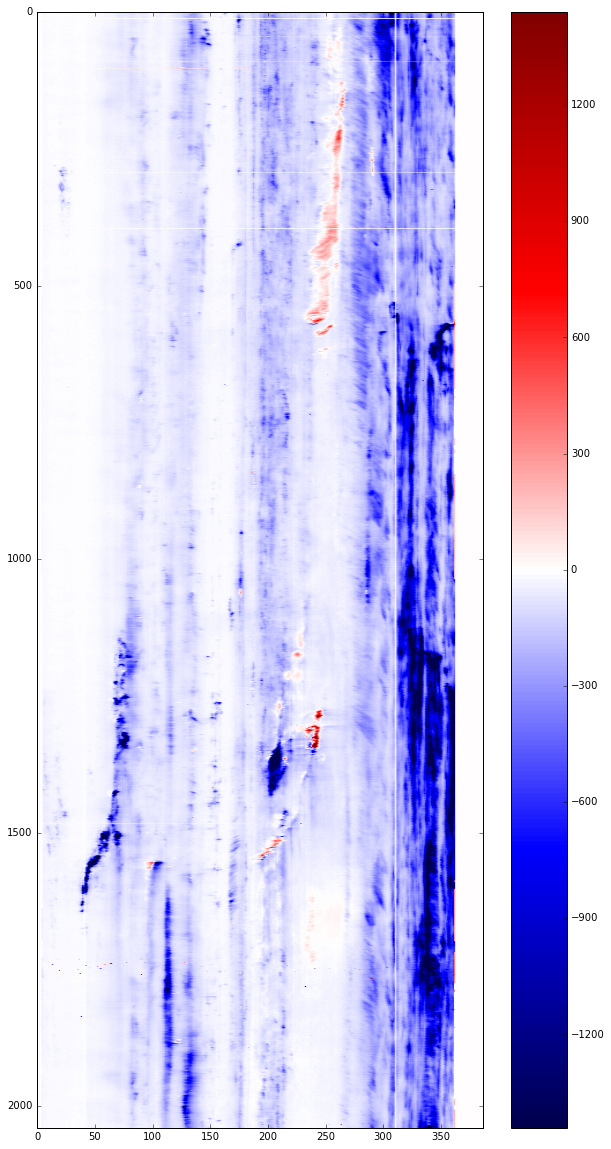

In [3]:

k_center = 2796.32

vel_mgii_k = (mgii_k - k_center) * 3e5 / k_center

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

i50p_mgii_k = find_nearest(vel_mgii_k,50.)
i50m_mgii_k = find_nearest(vel_mgii_k,-50.)

dopplergram_mgii_k = mgii_k_data[i50m_mgii_k,:,:] - mgii_k_data[i50p_mgii_k,:,:]
fig = plt.figure(figsize = (10,20))
plt.imshow(dopplergram_mgii_k,aspect='auto',cmap = 'seismic',
           vmin = (np.mean(dopplergram_mgii_k) - 5.*np.std(dopplergram_mgii_k)),
           vmax = np.abs(np.mean(dopplergram_mgii_k) - 5.*np.std(dopplergram_mgii_k)))
plt.colorbar()
plt.show()

In [23]:
print("Max of MgII k at -50 km/s: ",np.amin(mgii_k_data[i50m,:,:]))
print("Min of MgII k at -50 km/s: ",np.amax(mgii_k_data[i50m,:,:]))
print("Median of MgII k at -50 km/s: ",np.median(mgii_k_data[i50m,:,:]))
print("Mean of MgII k at -50 km/s: ",np.mean(mgii_k_data[i50m,:,:]))
print("StDev of MgII k at -50 km/s: ",np.std(mgii_k_data[i50m,:,:]))

print("Max of MgII k at +50 km/s: ",np.amin(mgii_k_data[i50p,:,:]))
print("Min of MgII k at +50 km/s: ",np.amax(mgii_k_data[i50p,:,:]))
print("Median of MgII k at +50 km/s: ",np.median(mgii_k_data[i50p,:,:]))
print("Mean of MgII k at +50 km/s: ",np.mean(mgii_k_data[i50p,:,:]))
print("StDev of MgII k at +50 km/s: ",np.std(mgii_k_data[i50p,:,:]))


print("Min of MgII k dopplergram: ",np.amin(dopplergram))
print("Max of MgII k dopplergram: ",np.amax(dopplergram))
print("Median of MgII k dopplergram: ",np.median(dopplergram))
print("Mean of MgII k dopplergram: ",np.mean(dopplergram))
print("StDev of MgII k dopplergram: ",np.std(dopplergram))

Max of MgII k at -50 km/s:  -94.0
Min of MgII k at -50 km/s:  4649.75
Median of MgII k at -50 km/s:  85.5
Mean of MgII k at -50 km/s:  117.946
StDev of MgII k at -50 km/s:  159.972
Max of MgII k at +50 km/s:  -35.75
Min of MgII k at +50 km/s:  16182.0
Median of MgII k at +50 km/s:  155.75
Mean of MgII k at +50 km/s:  261.47
StDev of MgII k at +50 km/s:  384.838
Min of MgII k dopplergram:  -12687.0
Max of MgII k dopplergram:  3404.25
Median of MgII k dopplergram:  -68.5
Mean of MgII k dopplergram:  -143.524
StDev of MgII k dopplergram:  259.512


Dopplergrams: Intensities at -50 km/s - Intensities at 50 km/s

Negative values indicate strong red-wing enhancement

Positive values indicate strong blue-wing enhancement

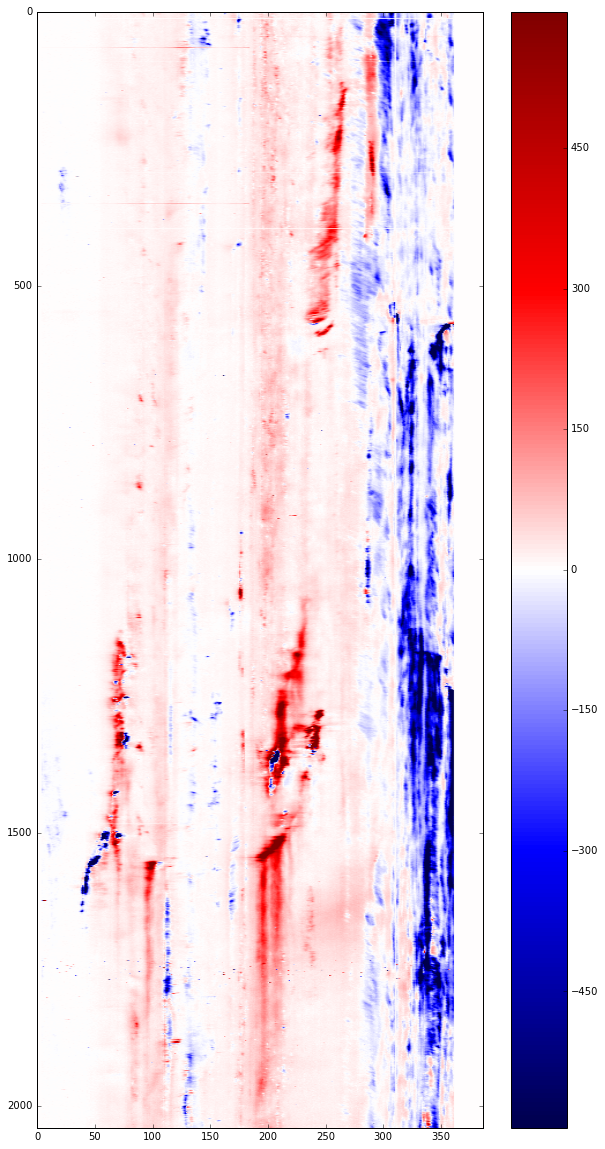

In [4]:
mgii_h = waves[(waves > 2800.) & (waves < 2808.)]

mgii_h_data = np.nan_to_num(iris_data[0].data[:,((waves > 2800.) & (waves < 2808.)),:,0])
h_center = 2803.531

vel_mgii_h = (mgii_h - h_center) * 3e5 / h_center

i50p_mgii_h = find_nearest(vel_mgii_h,50.)
i50m_mgii_h = find_nearest(vel_mgii_h,-50.)

dopplergram_mgii_h = mgii_h_data[i50m_mgii_h,:,:] - mgii_h_data[i50p_mgii_h,:,:]
fig = plt.figure(figsize = (10,20))
plt.imshow(dopplergram_mgii_h,aspect='auto',cmap = 'seismic',
           vmin = (np.mean(dopplergram_mgii_h) - 5.*np.std(dopplergram_mgii_h)),
           vmax = np.abs(np.mean(dopplergram_mgii_h) - 5.*np.std(dopplergram_mgii_h)))
plt.colorbar()
plt.show()

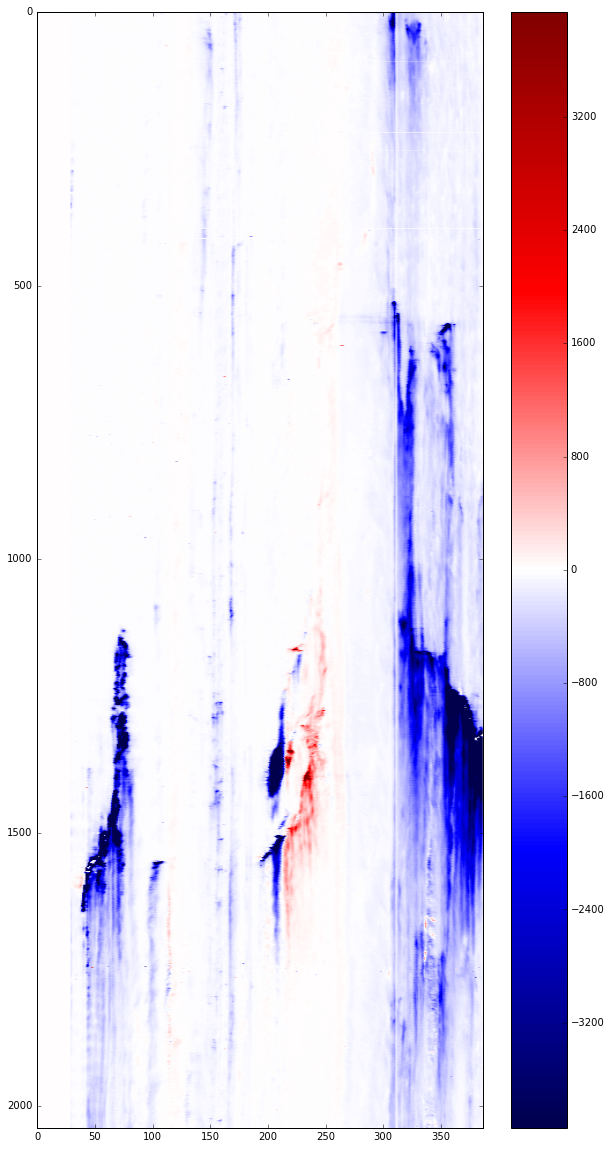

In [5]:
cii_1335 = waves[(waves > 1333.) & (waves < 1336.)]

cii_1335_data = np.nan_to_num(iris_data[0].data[:,((waves > 1333.) & (waves < 1336.)),:,0])
center_1335 = 1334.5350

vel_cii_1335 = (cii_1335 - center_1335) * 3e5 / center_1335

i50p_cii_1335 = find_nearest(vel_cii_1335,20.)
i50m_cii_1335 = find_nearest(vel_cii_1335,-20.)

dopplergram_cii_1335 = cii_1335_data[i50m_cii_1335,:,:] - cii_1335_data[i50p_cii_1335,:,:]
fig = plt.figure(figsize = (10,20))
plt.imshow(dopplergram_cii_1335,aspect='auto',cmap = 'seismic',
           vmin = (np.mean(dopplergram_cii_1335) - 5.*np.std(dopplergram_cii_1335)),
           vmax = np.abs(np.mean(dopplergram_cii_1335) - 5.*np.std(dopplergram_cii_1335)))
plt.colorbar()
plt.show()

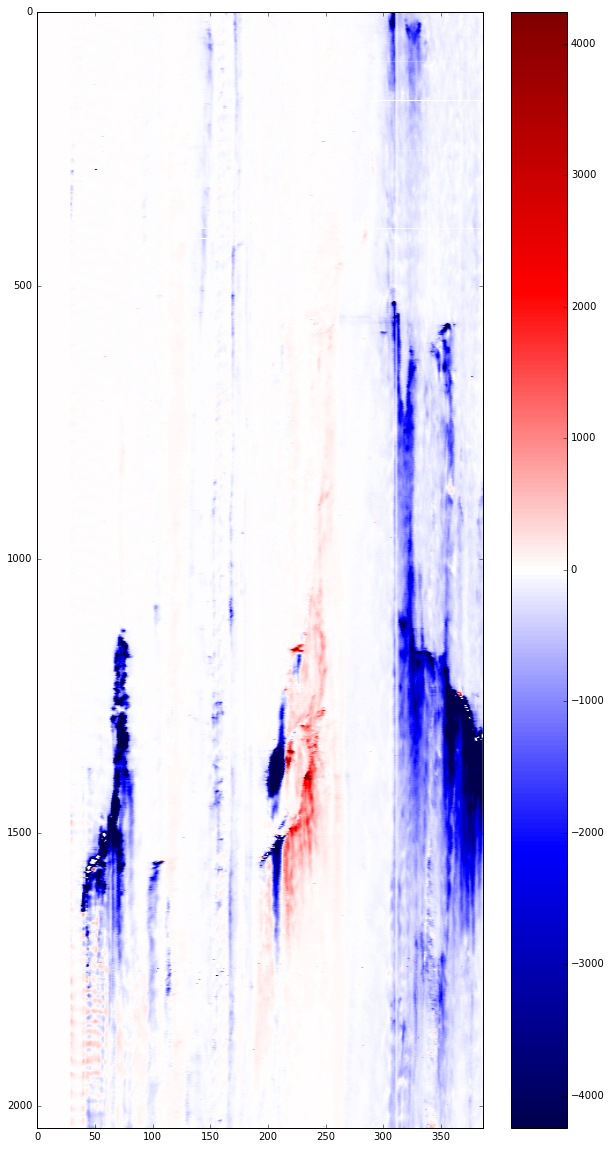

In [6]:
cii_1336 = waves[(waves > 1333.) & (waves < 1340.)]

cii_1336_data = np.nan_to_num(iris_data[0].data[:,((waves > 1333.) & (waves < 1340.)),:,0])
center_1336 = 1335.7100

vel_cii_1336 = (cii_1336 - center_1336) * 3e5 / center_1336

i50p_cii_1336 = find_nearest(vel_cii_1336,20.)
i50m_cii_1336 = find_nearest(vel_cii_1336,-20.)

dopplergram_cii_1336 = cii_1336_data[i50m_cii_1336,:,:] - cii_1336_data[i50p_cii_1336,:,:]
fig = plt.figure(figsize = (10,20))
plt.imshow(dopplergram_cii_1336,aspect='auto',cmap = 'seismic',
           vmin = (np.mean(dopplergram_cii_1336) - 5.*np.std(dopplergram_cii_1336)),
           vmax = np.abs(np.mean(dopplergram_cii_1336) - 5.*np.std(dopplergram_cii_1336)))
plt.colorbar()
plt.show()

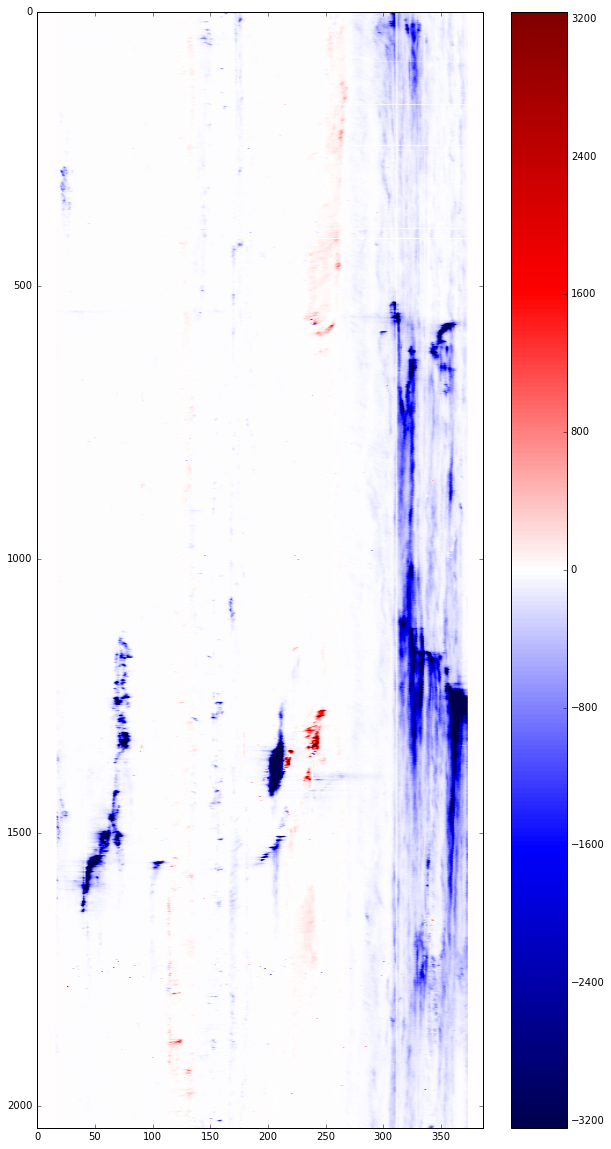

In [57]:
siiv_1394 = waves[(waves > 1390.) & (waves < 1398.)]

siiv_1394_data = np.nan_to_num(iris_data[0].data[:,((waves > 1390.) & (waves < 1398.)),:,0])
center_1394 = 1393.7570

vel_siiv_1394 = (siiv_1394 - center_1394) * 3e5 / center_1394

i50p_siiv_1394 = find_nearest(vel_siiv_1394,40.)
i50m_siiv_1394 = find_nearest(vel_siiv_1394,-40.)

dopplergram_siiv_1394 = siiv_1394_data[i50m_siiv_1394,:,:] - siiv_1394_data[i50p_siiv_1394,:,:]
fig = plt.figure(figsize = (10,20))
plt.imshow(dopplergram_siiv_1394,aspect='auto',cmap = 'seismic',
           vmin = (np.mean(dopplergram_siiv_1394) - 5.*np.std(dopplergram_siiv_1394)),
           vmax = np.abs(np.mean(dopplergram_siiv_1394) - 5.*np.std(dopplergram_siiv_1394)))
plt.colorbar()
plt.show()

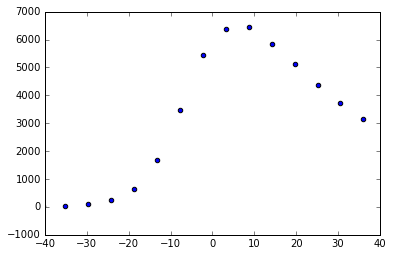

In [56]:
plt.scatter(vel_siiv_1394,siiv_1394_data[:,1500,60])
plt.xlim(-40,40)
plt.show()

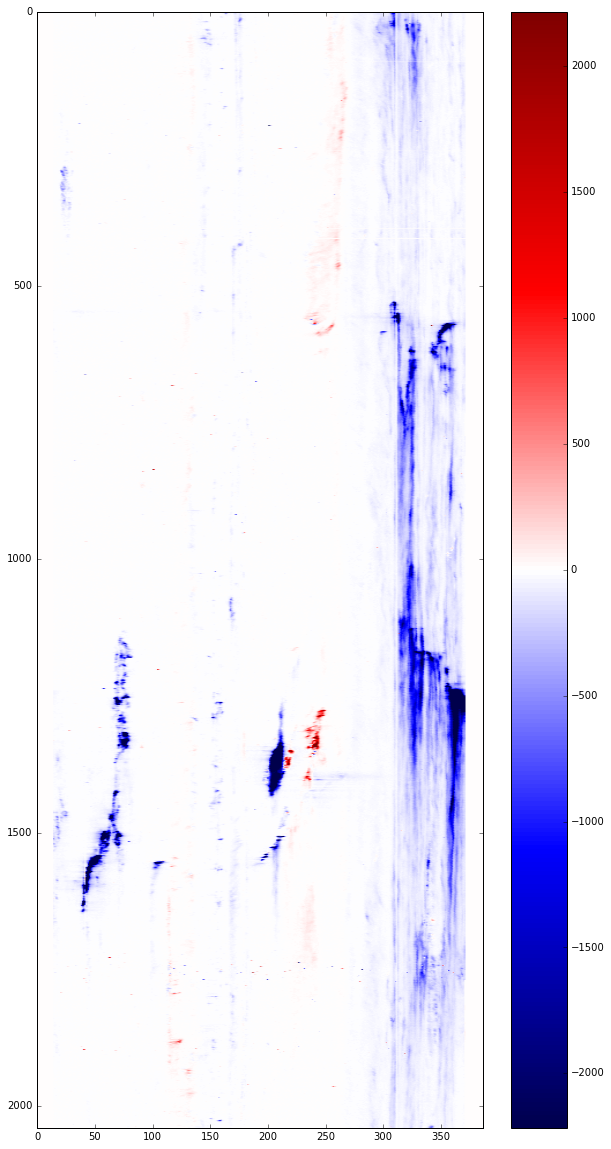

In [58]:
siiv_1403 = waves[(waves > 1399.) & (waves < 1407.)]

siiv_1403_data = np.nan_to_num(iris_data[0].data[:,((waves > 1399.) & (waves < 1407.)),:,0])
center_1403 = 1402.7720

vel_siiv_1403 = (siiv_1403 - center_1403) * 3e5 / center_1403

i50p_siiv_1403 = find_nearest(vel_siiv_1403,40.)
i50m_siiv_1403 = find_nearest(vel_siiv_1403,-40.)

dopplergram_siiv_1403 = siiv_1403_data[i50m_siiv_1403,:,:] - siiv_1403_data[i50p_siiv_1403,:,:]
fig = plt.figure(figsize = (10,20))
plt.imshow(dopplergram_siiv_1403,aspect='auto',cmap = 'seismic',
           vmin = (np.mean(dopplergram_siiv_1403) - 5.*np.std(dopplergram_siiv_1403)),
           vmax = np.abs(np.mean(dopplergram_siiv_1403) - 5.*np.std(dopplergram_siiv_1403)))
plt.colorbar()
plt.show()

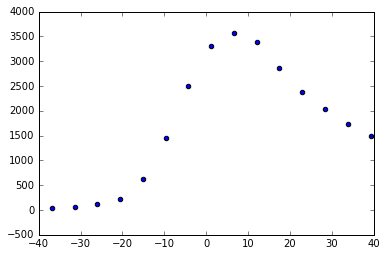

In [55]:
plt.scatter(vel_siiv_1403,siiv_1403_data[:,1500,60])
plt.xlim(-40,40)
plt.show()